In [42]:
import pandas as pd
import numpy as np
import scipy
import tpot
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

In [66]:
file1 = 'B_hhold_train.csv'
file2 = 'B_indiv_train.csv'
train_a_h = pd.read_csv(file1)
train_a_i = pd.read_csv(file2)

In [3]:
print (train_a_h.shape, train_a_i.shape)

((8203, 346), (37560, 44))


In [4]:
train_a_h.head(3)

,id,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
0,46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
1,82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
2,9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A


In [5]:
train_a_i.head(3)

,id,iid,HeUgMnzF,CaukPfUC,MzEtIdUF,gtnNTNam,SWoXNmPc,eXbOkwhI,OdXpbPGJ,XONDGWjH,...,ukWqmeSS,qqVibbSA,MgCoFhXK,rFpoTXAq,RXcLsVAQ,rQWIpTiG,XizJGmbu,xqUooaNJ,poor,country
0,80389,1,XJsPz,mOlYV,UFoKR,SSvEP,onRNG,YXCNt,4.0,oArAw,...,181,QQdHS,uEstx,Hikoa,zQvdC,xUYIC,juMSt,dSJoN,True,A
1,80389,2,XJsPz,mOlYV,axSTs,CXizI,onRNG,YXCNt,4.0,ccbZA,...,141,QQdHS,uEstx,Hikoa,zQvdC,xUYIC,juMSt,JTCKs,True,A
2,80389,3,TRFeI,mOlYV,axSTs,CXizI,NDnCs,YXCNt,4.0,fOUHD,...,41,QQdHS,gCSRj,Hikoa,zQvdC,rkLqZ,juMSt,JTCKs,True,A


In [6]:
train_a_i.dtypes

id            int64
iid           int64
HeUgMnzF     object
CaukPfUC     object
MzEtIdUF     object
gtnNTNam     object
SWoXNmPc     object
eXbOkwhI     object
OdXpbPGJ    float64
XONDGWjH     object
KsFoQcUV     object
qYRZCuJD     object
FPQrjGnS     object
hOamrctW     object
XacGrSou     object
UsmeXdIS     object
igHwZsYz     object
cxWuAOZv     object
AQpdiRUz     object
AoLwmlEH     object
nLUXHpZr     object
CRLlSiFu     object
jYpOAjPW     object
NAxEQZVi     object
QvgxCmCV     object
kvMGuSDN     object
AjYsrafY     object
GNaMafZC     object
zTLPJYTw     object
QKzxTGus     object
SGeOiUlZ     object
MUrHEJeh     object
XBldkztv     object
tbgZsPXD     object
ukWqmeSS      int64
qqVibbSA     object
MgCoFhXK     object
rFpoTXAq     object
RXcLsVAQ     object
rQWIpTiG     object
XizJGmbu     object
xqUooaNJ     object
poor           bool
country      object
dtype: object

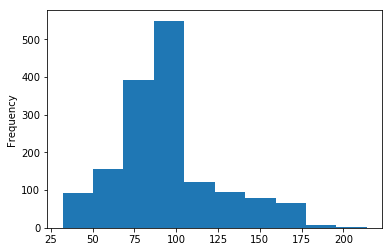

In [7]:
#plt.subplot(2,1,1)
#train_a_i[train_a_i.OdXpbPGJ <= 8].OdXpbPGJ.plot.hist()
#plt.subplot(2,1,2)
train_a_i[train_a_i.OdXpbPGJ >= 32].OdXpbPGJ.plot.hist()
plt.show()

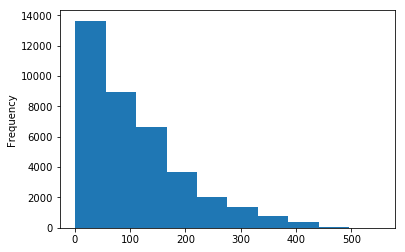

In [8]:
#plt.subplot(2,1,1)
#train_a_i[train_a_i.OdXpbPGJ <= 8].OdXpbPGJ.plot.hist()
#plt.subplot(2,1,2)
train_a_i.ukWqmeSS.plot.hist()
plt.show()

In [9]:
for i, col in enumerate(train_a_i.columns):
    if train_a_i[col].dtype == 'object':
        print (i,col, train_a_i[col].nunique())

(2, 'HeUgMnzF', 25)
(3, 'CaukPfUC', 3)
(4, 'MzEtIdUF', 3)
(5, 'gtnNTNam', 16)
(6, 'SWoXNmPc', 6)
(7, 'eXbOkwhI', 3)
(9, 'XONDGWjH', 15)
(10, 'KsFoQcUV', 5)
(11, 'qYRZCuJD', 3)
(12, 'FPQrjGnS', 8)
(13, 'hOamrctW', 15)
(14, 'XacGrSou', 25)
(15, 'UsmeXdIS', 7)
(16, 'igHwZsYz', 12)
(17, 'cxWuAOZv', 3)
(18, 'AQpdiRUz', 3)
(19, 'AoLwmlEH', 6)
(20, 'nLUXHpZr', 8)
(21, 'CRLlSiFu', 19)
(22, 'jYpOAjPW', 3)
(23, 'NAxEQZVi', 8)
(24, 'QvgxCmCV', 8)
(25, 'kvMGuSDN', 2)
(26, 'AjYsrafY', 5)
(27, 'GNaMafZC', 4)
(28, 'zTLPJYTw', 3)
(29, 'QKzxTGus', 3)
(30, 'SGeOiUlZ', 11)
(31, 'MUrHEJeh', 3)
(32, 'XBldkztv', 2)
(33, 'tbgZsPXD', 2)
(35, 'qqVibbSA', 7)
(36, 'MgCoFhXK', 3)
(37, 'rFpoTXAq', 3)
(38, 'RXcLsVAQ', 8)
(39, 'rQWIpTiG', 3)
(40, 'XizJGmbu', 3)
(41, 'xqUooaNJ', 5)
(43, 'country', 1)


In [10]:
for i, col in enumerate(train_a_h.columns):
    if train_a_h[col].dtype == 'object':
        print (i,col, train_a_h[col].nunique())

(1, 'wBXbHZmp', 2)
(2, 'SlDKnCuu', 2)
(3, 'KAJOWiiw', 3)
(4, 'DsKacCdL', 2)
(5, 'rtPrBBPl', 2)
(6, 'tMJrvvut', 2)
(7, 'jdetlNNF', 2)
(8, 'maLAYXwi', 3)
(9, 'vwpsXRGk', 31)
(10, 'sArDRIyX', 2)
(11, 'goxNwvnG', 2)
(12, 'TYhoEiNm', 2)
(13, 'bgfNZfcj', 2)
(14, 'sYIButva', 2)
(15, 'VZtBaoXL', 3)
(16, 'GUvFHPNA', 2)
(17, 'zFkComtB', 3)
(18, 'fxbqfEWb', 2)
(19, 'HDMHzGif', 2)
(20, 'zzwlWZZC', 2)
(21, 'nGTepfos', 2)
(22, 'DxLvCGgv', 2)
(23, 'CbABToOI', 3)
(24, 'qgMygRvX', 9)
(25, 'fhKiXuMY', 2)
(26, 'uSKnVaKV', 2)
(27, 'hESBInAl', 3)
(28, 'nzTeWUeM', 3)
(29, 'BbKZUYsB', 2)
(30, 'UCnazcxd', 2)
(31, 'hTraVEWP', 2)
(32, 'aCfsveTu', 2)
(33, 'EfkPrfXa', 2)
(34, 'NrvxpdMQ', 2)
(36, 'FcekeISI', 3)
(37, 'NmAVTtfA', 2)
(38, 'YTdCRVJt', 3)
(39, 'QyBloWXZ', 2)
(40, 'NGOnRdqc', 2)
(41, 'HKMQJANN', 3)
(42, 'ZRrposmO', 2)
(43, 'wakWLjkG', 2)
(44, 'vmZttwFZ', 2)
(45, 'dkoIJCbY', 2)
(46, 'NrUWfvEq', 3)
(47, 'WqhniYIc', 2)
(48, 'yHbEDILT', 2)
(49, 'EJgrQqET', 2)
(50, 'nGMEgWyl', 2)
(51, 'IIEHQNUc', 2)
(52, 'Hf

In [11]:
#for col in train_a_i.columns:
#    if train_a_i[col].dtype == 'object' and (train_a_i[col].nunique() > 3 or train_a_i[col].nunique() < 2):
#        train_a_i = train_a_i.drop([col],axis=1)       

In [12]:
print (train_a_i.shape)
print (train_a_i.head())

(37560, 44)
      id  iid HeUgMnzF CaukPfUC MzEtIdUF gtnNTNam SWoXNmPc eXbOkwhI  OdXpbPGJ  \
0  80389    1    XJsPz    mOlYV    UFoKR    SSvEP    onRNG    YXCNt       4.0   
1  80389    2    XJsPz    mOlYV    axSTs    CXizI    onRNG    YXCNt       4.0   
2  80389    3    TRFeI    mOlYV    axSTs    CXizI    NDnCs    YXCNt       4.0   
3  80389    4    XJsPz    yAyAe    FRcdT    CXizI    onRNG    YXCNt       NaN   
4  39883    1    XJsPz    mOlYV    UFoKR    HIvIU    onRNG    YXCNt       4.0   

  XONDGWjH   ...   ukWqmeSS qqVibbSA MgCoFhXK rFpoTXAq RXcLsVAQ rQWIpTiG  \
0    oArAw   ...        181    QQdHS    uEstx    Hikoa    zQvdC    xUYIC   
1    ccbZA   ...        141    QQdHS    uEstx    Hikoa    zQvdC    xUYIC   
2    fOUHD   ...         41    QQdHS    gCSRj    Hikoa    zQvdC    rkLqZ   
3    fOUHD   ...         16    QQdHS    uEstx    Hikoa    zQvdC    jVHyH   
4    oArAw   ...        381    QQdHS    uEstx    Hikoa    zQvdC    xUYIC   

  XizJGmbu xqUooaNJ   poor country  
0    ju

In [13]:
train_a_i = train_a_i.drop(['iid','country'],axis=1)

In [15]:
for col in train_a_i.columns:
    if train_a_i[col].dtype == 'object':
        if train_a_i[col].nunique() >= 3:
            onehot = pd.get_dummies(train_a_i[col])
            train_a_i = train_a_i.drop([col],axis=1)
            train_a_i = train_a_i.join(onehot)
        elif train_a_i[col].nunique() == 2:    
            le = LabelEncoder()
            train_a_i[col] = le.fit_transform(train_a_i[col])

In [16]:
print (train_a_i.head())
print (train_a_i.shape)

      id  OdXpbPGJ  kvMGuSDN  XBldkztv  tbgZsPXD  ukWqmeSS   poor  BNCcM  \
0  80389       4.0         1         0         1       181   True      0   
1  80389       4.0         0         1         1       141   True      0   
2  80389       4.0         0         1         1        41   True      0   
3  80389       NaN         0         1         1        16   True      0   
4  39883       4.0         0         1         1       381  False      0   

   HUpWg  JMXQx  ...    rkLqZ  xUYIC  FUUXv  GtHel  juMSt  ALcKg  JTCKs  \
0      0      0  ...        0      1      0      0      1      0      0   
1      0      0  ...        0      1      0      0      1      0      1   
2      0      0  ...        1      0      0      0      1      0      1   
3      0      0  ...        0      0      0      1      0      0      1   
4      0      0  ...        0      1      0      0      1      0      0   

   UaIsy  dSJoN  vhhVz  
0      0      1      0  
1      0      0      0  
2      0      0  

In [17]:
for i, col in enumerate(train_a_i.columns):
    print (i,col, train_a_i[col].isnull().any())

(0, 'id', False)
(1, 'OdXpbPGJ', True)
(2, 'kvMGuSDN', False)
(3, 'XBldkztv', False)
(4, 'tbgZsPXD', False)
(5, 'ukWqmeSS', False)
(6, 'poor', False)
(7, 'BNCcM', False)
(8, 'HUpWg', False)
(9, 'JMXQx', False)
(10, 'PAVsH', False)
(11, 'SJPkb', False)
(12, 'SlRmt', False)
(13, 'TRFeI', False)
(14, 'XJgvq', False)
(15, 'XJsPz', False)
(16, 'YsSBt', False)
(17, 'ayXFR', False)
(18, 'dHZCo', False)
(19, 'duBym', False)
(20, 'fmdsF', False)
(21, 'jnwBm', False)
(22, 'kuFXw', False)
(23, 'lBMrM', False)
(24, 'nIete', False)
(25, 'oGavK', False)
(26, 'slvTJ', False)
(27, 'tMiQp', False)
(28, 'vhanw', False)
(29, 'wWIzo', False)
(30, 'xnnDH', False)
(31, 'xsVYp', False)
(32, 'kzSFB', False)
(33, 'mOlYV', False)
(34, 'yAyAe', False)
(35, 'FRcdT', False)
(36, 'UFoKR', False)
(37, 'axSTs', False)
(38, 'CXizI', False)
(39, 'DQhEE', False)
(40, 'DaETh', False)
(41, 'GotAd', False)
(42, 'HIvIU', False)
(43, 'JyIRx', False)
(44, 'LvUxT', False)
(45, 'SSvEP', False)
(46, 'TKOAj', False)
(47, 'UklJv',

In [18]:
train_a_i.OdXpbPGJ = train_a_i.OdXpbPGJ.fillna(0)

In [19]:
train_a_i = train_a_i.drop(['poor'],axis=1)

In [20]:
train_a_i1 = train_a_i.groupby(['id']).sum().reset_index()
print (train_a_i1.head())

   id  OdXpbPGJ  kvMGuSDN  XBldkztv  tbgZsPXD  ukWqmeSS  BNCcM  HUpWg  JMXQx  \
0  14       8.0         1         2         2       602      0      0      0   
1  18      12.0         2         0         3       303      0      0      0   
2  36     216.0         3         1         4       946      0      0      0   
3  39      28.0         5         6         9       759      0      0      0   
4  58      16.0         2         3         4       769      0      0      0   

   PAVsH  ...    rkLqZ  xUYIC  FUUXv  GtHel  juMSt  ALcKg  JTCKs  UaIsy  \
0      0  ...        0      2      0      0      2      0      1      1   
1      0  ...        1      2      0      0      3      0      3      0   
2      0  ...        4      2      0      0      6      0      6      0   
3      0  ...        4      3      0      2      7      0      9      0   
4      0  ...        2      2      3      0      1      0      4      0   

   dSJoN  vhhVz  
0      0      0  
1      0      0  
2      0      

In [21]:
train_a_i2 = train_a_i.groupby(['id']).mean().reset_index()
print (train_a_i2.head())

   id   OdXpbPGJ  kvMGuSDN  XBldkztv  tbgZsPXD    ukWqmeSS  BNCcM  HUpWg  \
0  14   4.000000  0.500000  1.000000  1.000000  301.000000    0.0    0.0   
1  18   4.000000  0.666667  0.000000  1.000000  101.000000    0.0    0.0   
2  36  36.000000  0.500000  0.166667  0.666667  157.666667    0.0    0.0   
3  39   3.111111  0.555556  0.666667  1.000000   84.333333    0.0    0.0   
4  58   4.000000  0.500000  0.750000  1.000000  192.250000    0.0    0.0   

   JMXQx  PAVsH  ...       rkLqZ     xUYIC  FUUXv     GtHel     juMSt  ALcKg  \
0    0.0    0.0  ...    0.000000  1.000000   0.00  0.000000  1.000000    0.0   
1    0.0    0.0  ...    0.333333  0.666667   0.00  0.000000  1.000000    0.0   
2    0.0    0.0  ...    0.666667  0.333333   0.00  0.000000  1.000000    0.0   
3    0.0    0.0  ...    0.444444  0.333333   0.00  0.222222  0.777778    0.0   
4    0.0    0.0  ...    0.500000  0.500000   0.75  0.000000  0.250000    0.0   

   JTCKs  UaIsy  dSJoN  vhhVz  
0    0.5    0.5    0.0    0.0 

In [22]:
train_a_i3 = train_a_i.groupby(['id']).median().reset_index()
print (train_a_i3.head())

   id  OdXpbPGJ  kvMGuSDN  XBldkztv  tbgZsPXD  ukWqmeSS  BNCcM  HUpWg  JMXQx  \
0  14       4.0       0.5       1.0       1.0     301.0    0.0    0.0    0.0   
1  18       4.0       1.0       0.0       1.0      96.0    0.0    0.0    0.0   
2  36       4.0       0.5       0.0       1.0     121.0    0.0    0.0    0.0   
3  39       4.0       1.0       1.0       1.0      71.0    0.0    0.0    0.0   
4  58       4.0       0.5       1.0       1.0     181.0    0.0    0.0    0.0   

   PAVsH  ...    rkLqZ  xUYIC  FUUXv  GtHel  juMSt  ALcKg  JTCKs  UaIsy  \
0    0.0  ...      0.0    1.0    0.0    0.0    1.0    0.0    0.5    0.5   
1    0.0  ...      0.0    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
2    0.0  ...      1.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
3    0.0  ...      0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
4    0.0  ...      0.5    0.5    1.0    0.0    0.0    0.0    1.0    0.0   

   dSJoN  vhhVz  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.

In [23]:
for col in train_a_h.columns:
    if train_a_h[col].dtype == 'object':
        if train_a_h[col].nunique() < 2:
            train_a_h = train_a_h.drop([col],axis=1)
        elif train_a_h[col].nunique() == 2:
            le = LabelEncoder()
            train_a_h[col] = le.fit_transform(train_a_h[col])
        elif train_a_h[col].nunique() >= 3:
            onehot = pd.get_dummies(train_a_h[col])
            train_a_h = train_a_h.drop([col],axis=1)
            train_a_h = train_a_h.join(onehot)

In [24]:
print (train_a_h.head())
print (train_a_h.shape)

      id  wBXbHZmp  SlDKnCuu  DsKacCdL  rtPrBBPl  tMJrvvut  jdetlNNF  \
0  46107         1         0         1         0         0         0   
1  82739         1         0         1         0         0         0   
2   9646         1         0         1         1         0         0   
3  10975         1         0         1         0         0         0   
4  16463         1         1         1         0         0         0   

   sArDRIyX  goxNwvnG  TYhoEiNm  ...    ujWYB  IHYKX  wPGlI  xqXhV  CEvAs  \
0         1         1         1  ...        0      0      1      0      1   
1         1         1         1  ...        0      1      0      0      0   
2         1         1         1  ...        0      1      0      0      0   
3         1         1         1  ...        0      1      0      0      0   
4         1         1         1  ...        0      0      1      0      1   

   bsSvo  hxaxk  HxnJy  USRak  etZsD  
0      0      0      0      0      1  
1      0      1      1    

In [25]:
train_a_h = pd.merge(train_a_h, train_a_i1, how="left", left_on="id",right_on="id")
train_a_h = pd.merge(train_a_h, train_a_i2, how="left", left_on="id",right_on="id")
train_a_h = pd.merge(train_a_h, train_a_i3, how="left", left_on="id",right_on="id")
del train_a_i1, train_a_i2, train_a_i3

In [26]:
train_a_h.shape

(8203, 1399)

In [27]:
train_a_h.head()

,id,wBXbHZmp,SlDKnCuu,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,sArDRIyX,goxNwvnG,TYhoEiNm,...,rkLqZ,xUYIC,FUUXv,GtHel,juMSt,ALcKg,JTCKs,UaIsy,dSJoN,vhhVz
0,46107,1,0,1,0,0,0,1,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,82739,1,0,1,0,0,0,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,9646,1,0,1,1,0,0,1,1,1,...,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,10975,1,0,1,0,0,0,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,16463,1,1,1,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
print (max([train_a_h[col].isnull().any() for col in train_a_h.columns]))
#for i, col in enumerate(train_a_h.columns):
#    print (i,col, train_a_h[col].isnull().any())

False


In [29]:
cols = []
for i, col in enumerate(train_a_h.columns):
    if col not in ['id','poor']:
        cols.append('col'+str(i))
    else:
        cols.append(col)        

In [67]:
train_a_h.columns = cols
train_a_h.to_csv(file1.replace('.csv','_eng.csv'),index=False)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_a_h.drop(['poor'],axis=1),train_a_h.poor, train_size=.8)

C:\Users\asengup6\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
print (y_train.value_counts())/len(y_train)
print (y_test.value_counts())/len(y_test)

False    0.551966
True     0.448034
Name: poor, dtype: float64
False    0.53504
True     0.46496
Name: poor, dtype: float64


In [54]:
#tpot = TPOTClassifier(cv=3,verbosity=2,generations=5,population_size=50,scoring="neg_log_loss")

/home/victor/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/victor/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
#tpot.fit(X_train, y_train)

Optimization Progress:  28%|██▊       | 85/300 [1:07:56<1:32:18, 25.76s/pipeline]

In [53]:
rf = RandomForestClassifier(n_estimators=500)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

In [54]:
feat_selector.fit(X_train.as_matrix(), y_train.as_matrix())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1398
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1398
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1398
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1398
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1398
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1398
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1398
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	1302
Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	82
Rejected: 	1302
Iteration: 	10 / 100
Confirmed: 	14
Tentative: 	82
Rejected: 	1302
Iteration: 	11 / 100
Confirmed: 	14
Tentative: 	82
Rejected: 	1302
Iteration: 	12 / 100
Confirmed: 	14
Tentative: 	74
Rejected: 	1310
Iteration: 	13 / 100
Confirmed: 	14
Tentative: 	74
Rejected: 	1310
Iteration: 	14 / 100
Confirmed: 	14
Tentative: 	74
Rejected: 	1310
Iteration: 	15 / 100
Confirmed: 	14
Tentative: 	74
Rejected: 	1310
Iteration: 	16 / 10

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x000000000E195A20>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x000000000E195A20>,
     two_step=True, verbose=2)

In [55]:
feat_selector.ranking_

array([   2, 1146,  139, ...,  953,  805,  946])

In [59]:
train_boruta = feat_selector.transform(X_train.as_matrix())
test_boruta = feat_selector.transform(X_test.as_matrix())

In [56]:
rf2 = RandomForestClassifier(n_estimators=500)
rf2.fit(X_train,y_train)
pred_proba = rf2.predict_proba(X_test)
pred = rf2.predict(X_test)

In [63]:
#rf2 = RandomForestClassifier(n_estimators=5000)
#rf2.fit(train_boruta, y_train)
#pred_proba = rf2.predict_proba(test_boruta)
#pred = rf2.predict(test_boruta)

In [64]:
print (accuracy_score(y_test,pred))
print (log_loss(y_test,pred_proba[:,1]))
print (roc_auc_score(y_test,pred_proba[:,1]))

0.808653260207
0.411046189973
0.891373370313
